In [1]:
import torch
import torch.nn as nn

#Standard model class
class LinearModel(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_dim, out_dim)
        
    def forward(self,x):
        out = self.linear(x)
        return out
    
model = LinearModel(1, 1)

In [2]:
learnRate = 0.01
optimiser =  torch.optim.SGD(model.parameters(), lr =learnRate)
criterion = nn.MSELoss()

In [3]:
x_train=torch.tensor([i for i in range(10)], dtype = torch.float).reshape(-1,1)
#x_train = torch.randn(10).reshape(-1,1)
#x_train = torch.tensor([1,2,3,4,5,6,7,8,9,10], dtype=torch.float).reshape(-1,1)
y_train = torch.tensor([3*x*+5 for x in x_train]).reshape(-1,1) 

In [4]:
out = model(x_train) 
print(out)

tensor([[0.3556],
        [1.1466],
        [1.9376],
        [2.7286],
        [3.5197],
        [4.3107],
        [5.1017],
        [5.8927],
        [6.6837],
        [7.4748]], grad_fn=<AddmmBackward>)


In [5]:
import torch
import torch.nn as nn
x = torch.ones(2,3, dtype=torch.float)
lin=nn.Linear(3, 2)
print(lin(x))
print(lin.bias)
print(lin.weight)

tensor([[-0.5718,  0.2838],
        [-0.5718,  0.2838]], grad_fn=<AddmmBackward>)
Parameter containing:
tensor([-0.3863, -0.2905], requires_grad=True)
Parameter containing:
tensor([[-0.2730, -0.1346,  0.2220],
        [ 0.4537,  0.2082, -0.0877]], requires_grad=True)


In [6]:
epochs = 100
for epoch in range(epochs):
    inputs = x_train
    labels = y_train
    out = model(inputs)    
    optimiser.zero_grad()    
    loss = criterion(out, labels)    
    loss.backward()    
    optimiser.step()
    predicted = model.forward(x_train)    
    print('epoch{}, loss {}'.format(epoch, loss.item()))

epoch0, loss 5708.66552734375
epoch1, loss 987.7883911132812
epoch2, loss 172.1797332763672
epoch3, loss 31.255834579467773
epoch4, loss 6.892419338226318
epoch5, loss 2.666534900665283
epoch6, loss 1.919837474822998
epoch7, loss 1.7744029760360718
epoch8, loss 1.7330271005630493
epoch9, loss 1.709814190864563
epoch10, loss 1.6899198293685913
epoch11, loss 1.6707732677459717
epoch12, loss 1.651936411857605
epoch13, loss 1.6333287954330444
epoch14, loss 1.6149307489395142
epoch15, loss 1.5967445373535156
epoch16, loss 1.5787609815597534
epoch17, loss 1.5609791278839111
epoch18, loss 1.543399691581726
epoch19, loss 1.5260165929794312
epoch20, loss 1.508827805519104
epoch21, loss 1.4918345212936401
epoch22, loss 1.4750336408615112
epoch23, loss 1.458422303199768
epoch24, loss 1.4419962167739868
epoch25, loss 1.4257545471191406
epoch26, loss 1.409694790840149
epoch27, loss 1.3938204050064087
epoch28, loss 1.378122091293335
epoch29, loss 1.362601399421692
epoch30, loss 1.3472555875778198
ep

In [7]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[14.7686]])), ('linear.bias', tensor([1.4511]))])


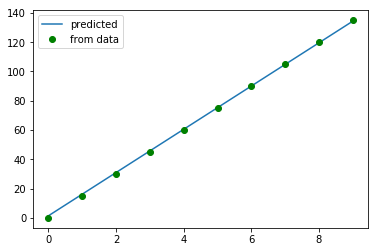

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

x = x_train.detach().numpy() 
plt.plot(x, predicted.detach().numpy(), label = 'predicted')
plt.plot(x, y_train.detach().numpy(),'go', label = 'from data')
plt.legend()
plt.show()

In [10]:
torch.save(model.state_dict(), './data/testmodel.pkl')

In [11]:
model = LinearModel(1,1)
model.load_state_dict(torch.load('./data/testmodel.pkl'))

In [13]:
predicted

tensor([[  1.4511],
        [ 16.2197],
        [ 30.9883],
        [ 45.7569],
        [ 60.5254],
        [ 75.2940],
        [ 90.0626],
        [104.8312],
        [119.5998],
        [134.3684]], grad_fn=<AddmmBackward>)